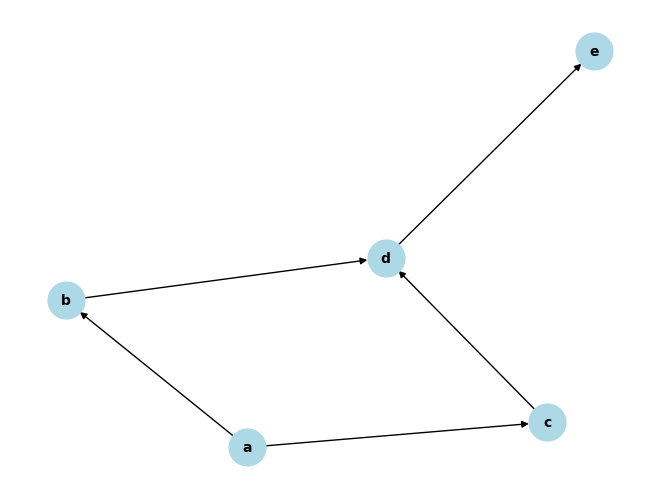

In [1]:
from rule import Rule
import networkx as nx
import matplotlib.pyplot as plt

G = nx.DiGraph()
G.add_edges_from([
    ('a', 'b'), ('a', 'c'), ('b', 'd'), ('c', 'd'), ('d', 'e')
])

# Draw the graph
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=700, font_size=10, font_weight='bold')

r = Rule("example_rule", G, G)

In [2]:
from query import Query
q = Query()
q.add_match(r.get_lhs_pattern(), r.get_lhs_carry_vars())
q.add_create_node()
q.add_redirect_incoming_edges_to_single_node()
q.add_redirect_outgoing_edges_to_single_node()
q.delete_old_nodes()
query_text = q.get_full_query()

print(query_text)

(nd)-[ede]->(me)
(nb)-[ebd]->(md)
(na)-[eab]->(mb)
(nc)-[ecd]->(md)
(na)-[eac]->(mc)
MATCH  (nd)-[ede]->(me), (nb)-[ebd]->(md), (na)-[eab]->(mb), (nc)-[ecd]->(md), (na)-[eac]->(mc)
WITH nb, na, mb, nc, me, mc, nd, md, eab, ecd, ede, ebd, eac

            CREATE (new_node:Vertex)
            

            WITH new_node, old_nodes
            UNWIND old_nodes AS old
            OPTIONAL MATCH (src)-[r_in]->(old)
            WHERE NOT src IN old_nodes
            WITH DISTINCT new_node, src, r_in, old_nodes
            WHERE src IS NOT NULL
            CREATE (src)-[new_in:LEG_TO]->(new_node)
            SET new_in = r_in
            DELETE r_in
            

            WITH new_node, old_nodes
            UNWIND old_nodes AS old
            OPTIONAL MATCH (old)-[r_out]->(dst)
            WHERE NOT dst IN old_nodes
            WITH DISTINCT new_node, dst, r_out, old_nodes
            WHERE dst IS NOT NULL
            CREATE (new_node)-[new_out:LEG_TO]->(dst)
            SET new_out = r_o